In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np
import flwr as fl
from model1 import load_data, create_preprocessor, build_model
import matplotlib.pyplot as plt

In [10]:
# Load data
file_path = 'cleaned_dataset1.txt'
X, y = load_data(file_path)

In [11]:
batch_size = 32  # Reduced batch size for better DP performance
num_microbatches = 32  # Should be <= batch_size for DP

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocess
preprocessor = create_preprocessor(X_train)
X_train_processed = preprocessor.fit_transform(X_train).astype(np.float32)
X_test_processed = preprocessor.transform(X_test).astype(np.float32)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Compute per-sample weights manually
sample_weights = np.where(y_train == 0, class_weight_dict[0], class_weight_dict[1]).astype(np.float32)

# Build model
input_shape = X_train_processed.shape[1]
model = build_model(input_shape, num_microbatches=num_microbatches)

print(f"Input shape: {input_shape}")
print(f"Training samples: {X_train_processed.shape[0]}")
print(f"Batch size: {batch_size}")
print(f"Num microbatches: {num_microbatches}")

# Train with sample weights

history = model.fit(
    X_train_processed, 
    y_train.astype(np.float32),  # Ensure consistent data types
    sample_weight=sample_weights,
    epochs=10,  # Reduced epochs for initial testing
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)
    
    # Evaluate
test_loss, test_acc = model.evaluate(X_test_processed, y_test.astype(np.float32), verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

d:\fedrated1\vienv\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
d:\fedrated1\vienv\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
d:\fedrated1\vienv\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
d

🔧 Building model with parameters:
  Layers: 3
  Units per layer: [32, 256, 128]
  Dropout: [0.13, 0.26, 0.39]
  BatchNorm: [True, False, False]
  Learning rate (DP): 0.00100
Input shape: 13
Training samples: 1178361
Batch size: 32
Num microbatches: 32
Epoch 1/10
29459/29459 [==============================] - 299s 10ms/step - loss: 3.4412 - accuracy: 0.9500 - val_loss: 2.8163 - val_accuracy: 0.9509
Epoch 2/10
29459/29459 [==============================] - 303s 10ms/step - loss: 3.8574 - accuracy: 0.9505 - val_loss: 2.8517 - val_accuracy: 0.9512
Epoch 3/10
29459/29459 [==============================] - 333s 11ms/step - loss: 3.8851 - accuracy: 0.9506 - val_loss: 3.0350 - val_accuracy: 0.9531
Epoch 4/10
29459/29459 [==============================] - 232s 8ms/step - loss: 4.0920 - accuracy: 0.9505 - val_loss: 3.0792 - val_accuracy: 0.9540
Epoch 5/10
29459/29459 [==============================] - 235s 8ms/step - loss: 4.1083 - accuracy: 0.9512 - val_loss: 3.4068 - val_accuracy: 0.9537
Epoch

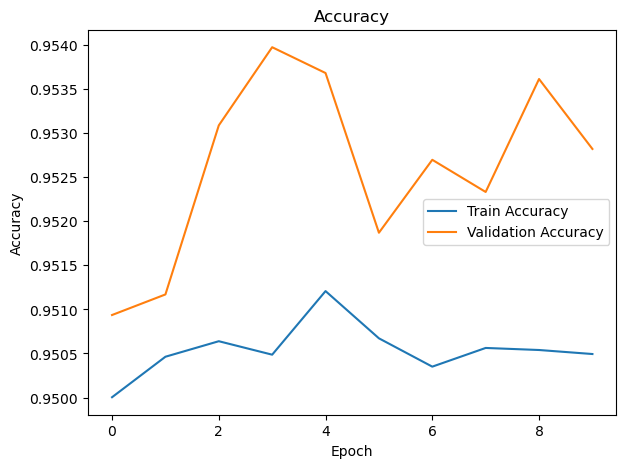

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Changed from 'test_accuracy' to 'val_accuracy'
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'history' is not defined

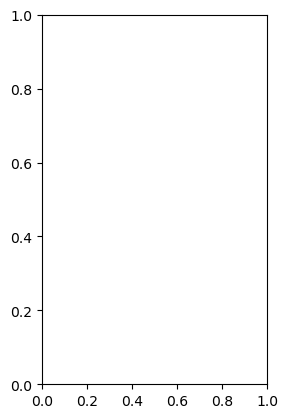

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()